In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import math

In [121]:
dataframe=pd.read_csv('signals.csv')                      #reading the csv file and storing it in a dataframe of Pandas.

In [122]:
dataframe

,x[n],y[n],n
0,35.4312,33.3735,0
1,35.1511,34.3744,1
2,34.8284,35.7514,2
3,34.4656,35.5869,3
4,34.0656,36.0826,4
...,...,...,...
188,31.4198,33.5967,188
189,31.7396,31.7135,189
190,32.0228,32.6819,190
191,32.2673,30.9260,191


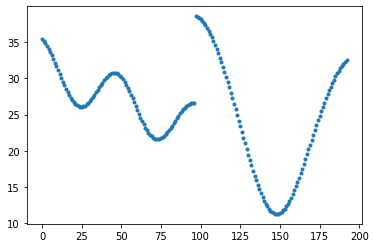

In [123]:
pl.plot(dataframe['n'],dataframe['x[n]'],'.')                       #plot x[n]
pl.show()

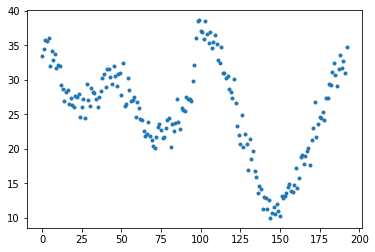

In [124]:
pl.plot(dataframe['n'],dataframe['y[n]'],'.')                        #plot y[n]
pl.show()

In [125]:
yn=dataframe['y[n]'].to_numpy()

In [126]:
yn=list(yn)                                     #converting yn into list

In [127]:
n=len(yn)
denoised_yn=[]
for i in range(n):                                        #applying averaging to convert yn into denoised yn...
    if i==0:
        denoised_yn.append((yn[0]+yn[1])/2)
    elif i==n-1:
        denoised_yn.append((yn[n-2]+yn[n-1])/2)
    else:
        denoised_yn.append((yn[i-1]+yn[i]+yn[i+1])/3)
    



In [128]:

dataframe.loc[:,'Denoised Yn']=denoised_yn

In [129]:
dataframe

,x[n],y[n],n,Denoised Yn
0,35.4312,33.3735,0,33.873950
1,35.1511,34.3744,1,34.499767
2,34.8284,35.7514,2,35.237567
3,34.4656,35.5869,3,35.806967
4,34.0656,36.0826,4,34.524700
...,...,...,...,...
188,31.4198,33.5967,188,32.294867
189,31.7396,31.7135,189,32.664033
190,32.0228,32.6819,190,31.773800
191,32.2673,30.9260,191,32.777867


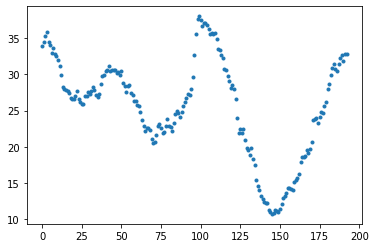

In [130]:
pl.plot(dataframe['n'],dataframe['Denoised Yn'],'.')                             #plot denoised yn

In [131]:
Hk=[]                                                              
w=(2*math.pi)/193
for k in range(5):                                                              # Calculating fourier transforn of h. 
    a=((1/8)*math.cos(2*w*k)+(1/2)*math.cos(k*w)+(3/8))
    Hk.append(a)


During calulating fouriers of h and denoided_yn, we are only taking 5 values of k..if we will take 193 values the at then it will create problem as Hk will be tending to 0.. which will affect Xjw..so for convenience we took k=5. we can increse value of k to 60,70 but that is not affecting our final result.

In [132]:
dataframe.loc[range(5),'H(k)']=Hk

In [133]:
def euler(number, radians):                        #defining function for dealing with complex forms.. number=(magnitude of complex)  and  radians=(angle of complex number in radians)
    n = number
    return (math.e**(radians*1j)) * n


In [134]:
Yk=[]
a=(2*math.pi)/193
for k in range(5):                                #calculating fourier of denoised yn.
    sum=0
    for n in range(193):
        sum=sum+euler(denoised_yn[n],-(n*a*k))
    Yk.append(sum)

In [135]:
dataframe.loc[range(5),'Y(k)']=Yk

In [136]:
dataframe.head(193)

,x[n],y[n],n,Denoised Yn,H(k),Y(k)
0,35.4312,33.3735,0,33.873950,1.000000,4914.428033+0.000000j
1,35.1511,34.3744,1,34.499767,0.999470,-10.076699-435.067447j
2,34.8284,35.7514,2,35.237567,0.997882,583.058071-305.953708j
3,34.4656,35.5869,3,35.806967,0.995240,18.289286+439.393939j
4,34.0656,36.0826,4,34.524700,0.991551,156.824231-87.668727j
...,...,...,...,...,...,...
188,31.4198,33.5967,188,32.294867,NaN,N0000000000a0000000000N
189,31.7396,31.7135,189,32.664033,NaN,N0000000000a0000000000N
190,32.0228,32.6819,190,31.773800,NaN,N0000000000a0000000000N
191,32.2673,30.9260,191,32.777867,NaN,N0000000000a0000000000N


In [137]:
Xjw=np.array(Yk)/np.array(Hk)


In [138]:
xn1=[]
for n in range(193):                                   #calculating inverse fourier transform
    sum=0
    for k in range(5):
        sum=sum+euler(Xjw[k],k*a*n)
    xn1.append(sum/193)
New_xn=np.array(xn1)

In [139]:
dataframe.loc[:,'x[n]1']=xn1


In [140]:
dataframe

,x[n],y[n],n,Denoised Yn,H(k),Y(k),x[n]1
0,35.4312,33.3735,0,33.873950,1.000000,4914.428033+0.000000j,29.353258-2.014619j
1,35.1511,34.3744,1,34.499767,0.999470,-10.076699-435.067447j,29.352682-1.706103j
2,34.8284,35.7514,2,35.237567,0.997882,583.058071-305.953708j,29.325299-1.405211j
3,34.4656,35.5869,3,35.806967,0.995240,18.289286+439.393939j,29.272155-1.114563j
4,34.0656,36.0826,4,34.524700,0.991551,156.824231-87.668727j,29.194583-0.836663j
...,...,...,...,...,...,...,...
188,31.4198,33.5967,188,32.294867,NaN,N0000000000a0000000000N,28.938096-3.576155j
189,31.7396,31.7135,189,32.664033,NaN,N0000000000a0000000000N,29.076912-3.270426j
190,32.0228,32.6819,190,31.773800,NaN,N0000000000a0000000000N,29.188113-2.958706j
191,32.2673,30.9260,191,32.777867,NaN,N0000000000a0000000000N,29.271278-2.643672j


C:\Users\priya\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


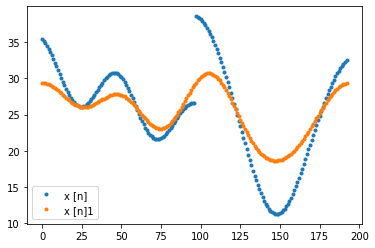

In [141]:
pl.plot(dataframe['n'],dataframe['x[n]'],'.',label='x [n]')
pl.plot(dataframe['n'],dataframe['x[n]1'],'.',label='x [n]1')
pl.legend(loc='lower left')